<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [1]:
import numpy as np

### 1.2 NumPy’s PRNG

In [2]:
np.random.rand()

0.009297050873858903

In [3]:
np.random.rand(10) 

array([0.9066729 , 0.3460826 , 0.43516263, 0.39499133, 0.15406101,
       0.32506724, 0.86086423, 0.24812699, 0.92953352, 0.38620915])

In [4]:
np.random.rand(5,2) 

array([[0.58624172, 0.41937306],
       [0.75199226, 0.08714231],
       [0.47575784, 0.55911649],
       [0.81564343, 0.26479957],
       [0.18420091, 0.19638681]])

In [5]:
#All numbers necessarily between 0-1 and largely evenly distributed to cover interval between 0-1. 

n = 10000
random_numbers = np.random.rand(n)

In [6]:
#Numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.66

In [7]:
#Numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.0

### 1.3 A simple graphical test

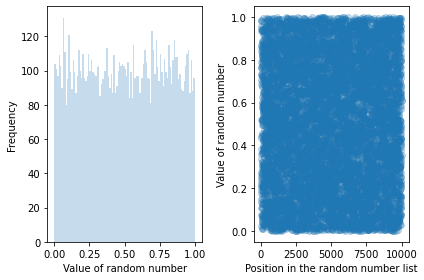

In [8]:
import matplotlib.pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()

### 1.4 Uniformly beyond \([0,1)\)

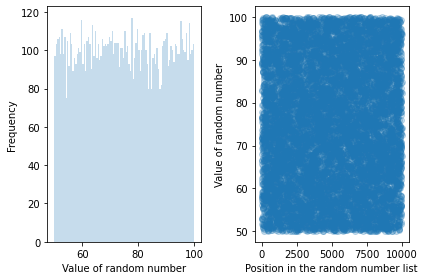

In [9]:
#For random numbers distirbuted over a range 0 and 1
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()

### 1.5 ‘seeding’ a PRNG

In [10]:
#Ten random integers between 0 and 100
np.random.randint(0, 100, 10) 

array([45, 90,  7, 54, 48, 28, 88,  3, 22,  5])

In [11]:
#Another random 10
np.random.randint(0, 100, 10)

array([68, 43, 45,  3, 91, 12, 99, 15, 38, 16])

In [12]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [13]:
np.random.seed(1234) #Assigning a seed allows you to access the same set of random numbers
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [14]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [15]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n') #\n creates a new line 

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [16]:
np.random.choice(['Head', 'Tails'])

'Head'

In [17]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [18]:
def flip_coins(no_of_coins=1, probability=.5): #Fair coin 
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [19]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

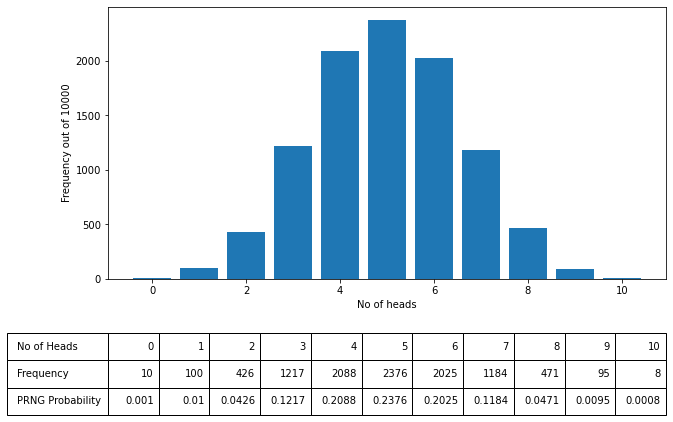

In [20]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [21]:
from scipy.stats import binom

binom.pmf(k=7, n=10, p=.5)

0.11718750000000014

In [22]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [23]:
no_of_coins = 27
no_of_heads = flip_coins(no_of_coins, probability = .9889)
no_of_repeats = 10000
result = [flip_coins(no_of_coins, probability = .9889) for _ in range(no_of_repeats)]
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 3.70%


In [24]:
print(result)

[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 

In [25]:
np.mean(result)

0.2918

In [26]:
np.std(result)

0.5329660026680877

In [27]:
result_array = np.array(result)
result_array <= 0 
new_result_array = result_array
new_result_array.sum()
no_of_repeats = 10000
new_result_array.sum()/no_of_repeats #Probability of no 13C atoms

0.2918